In [1]:
import pandas as pd
import numpy as np

atd = pd.read_csv("attendance_oct_nov_2025.csv")
        

In [ ]:
import matplotlib.pyplot as plt

class AttendanceData:
    """
    This class takes an already-loaded dataframe and computes punctuality fields.
    """

    def __init__(self, atd, official_start_time ="08:30"):
        self.atd_raw = atd.copy()
        self.official_start_time = official_start_time
        self.official_start_dt = pd.to_datetime(official_start_time, format="%H:%M")
        self.atd_clean = None
        self._process()

    def _process(self): #this method processes time data and makes it easily analytical
        atd = self.atd_raw
        atd["date"] = pd.to_datetime(atd["date"])
        atd["arrival_dt"] = pd.to_datetime(atd["arrival_time"], format="%H:%M", errors="coerce")   
        atd["departure_dt"] = pd.to_datetime(atd["departure_time"], format="%H:%M", errors="coerce")

        atd["attended"] = atd["attended"].astype(int) #attended being integer

        atd["minutes_late"] = (atd["arrival_dt"] - self.official_start_dt).dt.total_seconds() / 60 #minutes late = arrival - official time

        atd["work_hours"] = (atd["departure_dt"] - atd["arrival_dt"]).dt.total_seconds() / 3600 #hours worked = departure - arrival

        self.atd_clean = atd

    def per_employee_stats(self): 
        staff_groups = self.atd_clean.groupby("staff")
        stats = {}

        for name, group_df in staff_groups:
            stats[name] = EmployeeAttdStats(name, group_df)

        return stats
    
    def employee_summary(self): #this method summarises table staff attendance data
    
        stats = self.per_employee_stats()

        rows = []

        for name, obj in stats.items():
             # Days attended
            days_present = obj.atd["attended"].sum()

            # Monthly outputs and targets 
            outputs = obj.atd["outputs_month"].max()
            targets = obj.atd["targets_month"].max()

            rows.append({
                "staff": name,
                "days_attended": days_present,
                "avg_minutes_late": obj.avg_minutes_late(),
                "avg_arrival_time": obj.avg_arrival_time(),
                "avg_departure_time": obj.avg_departure_time(),
                "outputs_month": outputs,
                "targets_month": targets
            })

        return pd.DataFrame(rows)


    def plot_attendance_vs_output(self): #this method produces scatter plot of attendance vs output
    
        summary = self.employee_summary()

        plt.figure(figsize=(7, 5))
        plt.scatter(summary["days_attended"], summary["outputs_month"])

        # Adding labels to each point
        for i, row in summary.iterrows():
            plt.text(row["days_attended"] + 0.1, 
                     row["outputs_month"] + 0.1,
                     row["staff"].split()[0].title(),
                     fontsize=8)

        plt.xlabel("Days Attended")
        plt.ylabel("Monthly Output")
        plt.title("Attendance vs Output")
        plt.grid(True)
        plt.show()


    def plot_punctuality_vs_output(self):
    
        summary = self.employee_summary()

        plt.figure(figsize=(7, 5))
        plt.scatter(summary["avg_minutes_late"], summary["outputs_month"])

        for i, row in summary.iterrows():
            plt.text(row["avg_minutes_late"] + 0.1,
                     row["outputs_month"] + 0.1,
                     row["staff"].split()[0].title(),
                     fontsize=8)

        plt.xlabel("Average Minutes Late (negative = early)")
        plt.ylabel("Monthly Output")
        plt.title("Punctuality vs Output")
        plt.axvline(0, color='gray', linestyle='--')  # Zero-lateness line
        plt.grid(True)
        plt.show()

In [ ]:
class EmployeeAttdStats:

    """
    This class computes average arrival and departure times for a single employee.
    """
    def __init__(self, name, atd):
        self.name = name
        self.atd = atd

    def avg_arrival_time(self):
        times = self.atd["arrival_dt"].dropna()    
        if times.empty:
            return None
        return times.mean().time()
    
    def avg_departure_time(self):
        times = self.atd["departure_dt"].dropna()
        if times.empty:
            return None
        return times.mean().time()
    
    def avg_minutes_late(self):
        times = self.atd["minutes_late"].dropna()
        if times.empty:
            return None
        return round(times.mean(), 1)
    


In [29]:
dataset = AttendanceData(atd)

stats = dataset.per_employee_stats()

for staff, obj in stats.items():
    print(staff)
    print("  Avg Arrival:", obj.avg_arrival_time())
    print("  Avg Departure:", obj.avg_departure_time())
    print("  Avg Minutes Late:", obj.avg_minutes_late())
    print()

isiko emmanuel
  Avg Arrival: 08:30:31.999999
  Avg Departure: 17:58:28
  Avg Minutes Late: 0.5

khaluf rehema
  Avg Arrival: 08:19:56.666667
  Avg Departure: 17:45:36.666666
  Avg Minutes Late: -10.1

kirunda fahad
  Avg Arrival: 08:27:37.500000
  Avg Departure: 17:58:00
  Avg Minutes Late: -2.4

mugalu bashir
  Avg Arrival: 08:24:10
  Avg Departure: 17:46:36.666666
  Avg Minutes Late: -5.8

mugoya musa
  Avg Arrival: 08:29:13.333332
  Avg Departure: 17:41:26.666666
  Avg Minutes Late: -0.8

nandera habiba
  Avg Arrival: 08:23:26.666666
  Avg Departure: 17:53:36.666666
  Avg Minutes Late: -6.6

okello kenneth
  Avg Arrival: 08:30:09
  Avg Departure: 17:50:54
  Avg Minutes Late: 0.2

olaro emmanuel eugene
  Avg Arrival: 08:36:56.666666
  Avg Departure: 17:48:56.666666
  Avg Minutes Late: 6.9

rashida nesimbo
  Avg Arrival: 08:26:43.333332
  Avg Departure: 17:43:46.666666
  Avg Minutes Late: -3.3

tibiwa masitula
  Avg Arrival: 08:30:21
  Avg Departure: 17:47:09
  Avg Minutes Late: 0.4


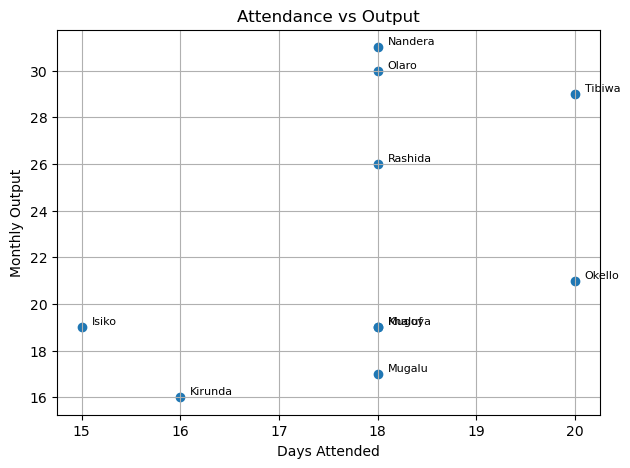

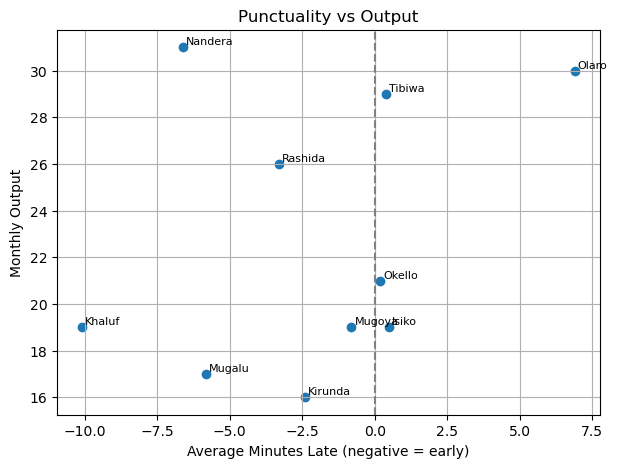

In [30]:
dataset.plot_attendance_vs_output()
dataset.plot_punctuality_vs_output()